In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import pickle
import os
import networkx as nx
from collections import Counter
from logbin230119 import logbin

In [59]:
class Network:
    def __init__(self, m, prob, N=False):
        '''Creates a graph represented by a list of N lists where each
        inner list shows all neighbours connected to that vertex. Initialises
        with each vertex having 1 edge.
        Parameters
        ----------
        N : int
            Size of graph to initialise
        m : int
            Number of edges to add with each new vertex
        prob : str
            Probability model to use. 'preferential' or 'random'
        '''
        prob_models = ['preferential', 'random']
        if prob not in list(prob_models):
            raise ValueError("prob should be in {}".format(str(prob_models)))
        if N is False:
            self.N = m + 1
        else:
            self.N = N
        self.m = m
        self.prob = prob
        self.graph = self.initialise_graph()
        self.vertex_list = self.initialise_vertex_list()
        self.G = None
        self.vertices = None
        self.degree = None
        self.deg_freq = None
        
    def initialise_graph(self):
        adj_list = [[n] for n in range(self.N)]
        for vertex in adj_list:
            neighbours = [i for i in range(self.N) if i > vertex[0]]
            vertex.extend(neighbours)
        return adj_list
    
    def initialise_vertex_list(self):
        '''List of vertices to choose neighbours from. For the preferential case,
        each vertex is repeated the same number of times as its degree.'''
        vertex_list = [i for i in range(self.N)]
        if self.prob == 'preferential':
            vertex_list *= self.m
        return vertex_list
    
    def convert_networkx(self):
        '''Saves as a networkx graph object'''
        adj_list = [' '.join(map(str, i)) for i in self.graph]
        self.G = nx.parse_adjlist(adj_list)
    
    def draw_graph(self):
        '''Generates the graph using networkx package.'''
        nx.draw(self.G)
    
    def add_vertex(self, neighbours):
        '''Adds a vertex with given neighbours and update neighbours.'''
        for n in neighbours:
            self.graph[n].append(self.N)
        self.graph.append([self.N])
        return self
        
    def add_edges(self, a, b):
        '''Adds an edge between two vertices a and b'''
        self.graph[a].append(b)
        self.graph[b].append(a)
    
    def gen_neighbours(self, m):
        '''Generates a list of m neighbours from vertex list.'''
        neighbours = list(set(random.sample(self.vertex_list, m)))
        i = m - len(neighbours)
        while i > 0:
            neighbours.extend(random.sample(self.vertex_list, i))
            neighbours = list(set(neighbours))
            i = m - len(neighbours)
        return neighbours
    
    def update_vertex_list(self, neighbours):
        if self.prob == 'preferential':
            self.vertex_list.extend(neighbours)
            self.vertex_list.extend([self.N] * self.m)
        elif self.prob == 'random':
            self.vertex_list.append(self.N)
        
    def add_vertices(self, N):
        '''Adds vertices until graph has N number of vertices'''
        if N < self.N:
            print('Given N is smaller than number of vertices')
        while self.N < int(N):
            neighbours = self.gen_neighbours(self.m)
            self.add_vertex(neighbours)
            self.update_vertex_list(neighbours)
            self.N += 1
        return self

    def count_deg(self):
        self.vertices = [n for n in range(self.N)]
        self.degree = [0 for n in range(self.N)]
        for vertex in self.graph:
            self.degree[vertex[0]] += len(vertex) - 1
            for neighbour in vertex[1:]:
                self.degree[neighbour] += 1
        return self
    
    def count_deg_freq(self):
        self.deg_freq = dict(Counter(self.degree))
        return self

In [24]:
pref = Network(3, 'preferential')
rand = Network(3, 'random')

In [25]:
pref.add_vertices(1e6).count_deg().count_deg_freq(save='test')
#rand.add_vertices(1e5).count_deg().count_deg_freq()

Counter({2430: 1,
         2073: 1,
         1831: 1,
         2756: 1,
         1922: 1,
         1753: 1,
         2068: 1,
         893: 1,
         1528: 1,
         555: 1,
         1662: 1,
         647: 1,
         2037: 1,
         437: 1,
         944: 1,
         530: 1,
         247: 2,
         815: 1,
         552: 1,
         1558: 1,
         385: 1,
         216: 2,
         521: 1,
         1050: 1,
         381: 1,
         895: 1,
         671: 1,
         336: 3,
         551: 1,
         813: 1,
         348: 1,
         244: 2,
         279: 1,
         101: 19,
         302: 2,
         586: 1,
         249: 1,
         591: 1,
         481: 1,
         987: 1,
         764: 1,
         228: 5,
         365: 1,
         602: 1,
         649: 1,
         737: 1,
         540: 1,
         209: 2,
         334: 1,
         433: 1,
         883: 1,
         344: 1,
         1028: 1,
         463: 1,
         468: 1,
         130: 13,
         612: 1,
         153: 9,

In [26]:
df = pd.read_pickle('data/test.p')

In [36]:
data = dict(pickle.load(open('data/test.p', 'rb')))
data

{2430: 1,
 2073: 1,
 1831: 1,
 2756: 1,
 1922: 1,
 1753: 1,
 2068: 1,
 893: 1,
 1528: 1,
 555: 1,
 1662: 1,
 647: 1,
 2037: 1,
 437: 1,
 944: 1,
 530: 1,
 247: 2,
 815: 1,
 552: 1,
 1558: 1,
 385: 1,
 216: 2,
 521: 1,
 1050: 1,
 381: 1,
 895: 1,
 671: 1,
 336: 3,
 551: 1,
 813: 1,
 348: 1,
 244: 2,
 279: 1,
 101: 19,
 302: 2,
 586: 1,
 249: 1,
 591: 1,
 481: 1,
 987: 1,
 764: 1,
 228: 5,
 365: 1,
 602: 1,
 649: 1,
 737: 1,
 540: 1,
 209: 2,
 334: 1,
 433: 1,
 883: 1,
 344: 1,
 1028: 1,
 463: 1,
 468: 1,
 130: 13,
 612: 1,
 153: 9,
 526: 1,
 313: 2,
 303: 1,
 862: 1,
 264: 2,
 726: 1,
 326: 1,
 214: 2,
 136: 10,
 246: 2,
 81: 46,
 338: 2,
 324: 1,
 151: 7,
 339: 1,
 211: 5,
 226: 3,
 195: 4,
 80: 47,
 223: 2,
 383: 1,
 442: 1,
 292: 2,
 78: 37,
 369: 2,
 98: 16,
 160: 12,
 604: 1,
 522: 1,
 201: 7,
 240: 5,
 465: 1,
 376: 1,
 304: 1,
 120: 15,
 142: 13,
 235: 4,
 127: 16,
 426: 1,
 372: 1,
 446: 2,
 345: 1,
 283: 1,
 243: 4,
 139: 10,
 182: 6,
 82: 64,
 225: 3,
 293: 1,
 358: 2,
 364: 1

In [35]:
pref.count_deg_freq()

Counter({2430: 1,
         2073: 1,
         1831: 1,
         2756: 1,
         1922: 1,
         1753: 1,
         2068: 1,
         893: 1,
         1528: 1,
         555: 1,
         1662: 1,
         647: 1,
         2037: 1,
         437: 1,
         944: 1,
         530: 1,
         247: 2,
         815: 1,
         552: 1,
         1558: 1,
         385: 1,
         216: 2,
         521: 1,
         1050: 1,
         381: 1,
         895: 1,
         671: 1,
         336: 3,
         551: 1,
         813: 1,
         348: 1,
         244: 2,
         279: 1,
         101: 19,
         302: 2,
         586: 1,
         249: 1,
         591: 1,
         481: 1,
         987: 1,
         764: 1,
         228: 5,
         365: 1,
         602: 1,
         649: 1,
         737: 1,
         540: 1,
         209: 2,
         334: 1,
         433: 1,
         883: 1,
         344: 1,
         1028: 1,
         463: 1,
         468: 1,
         130: 13,
         612: 1,
         153: 9,

### Check programme
Fat tails are observed as expected for preferential, and a sharp logarithmic for random.

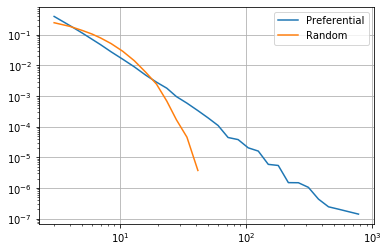

In [109]:
x_p, y_p = logbin(pref.degree, scale=1.2, zeros=False)
x_r, y_r = logbin(rand.degree, scale=1.2, zeros=False)
plt.grid()
plt.loglog(x_p, y_p, label='Preferential')
plt.loglog(x_r, y_r, label='Random')
plt.legend()
plt.show()

### Data Generation

In [38]:
a = 10 # Number of repeated simulations for each model
b = [1, 2, 4, 8, 16, 32, 64]
N = 1e5 # Max number of vertices
pref_data = {}
rand_data = {}
for m in b:
    pref_data_m = []
    rand_data_m = []
    for i in range(a):
        pref = Network(m, 'preferential')
        rand = Network(m, 'random')
        pref.add_vertices(N).count_deg().count_deg_freq()
        pref_data_m.append(pref.deg_freq)
        rand.add_vertices(1e5).count_deg().count_deg_freq()save='rand_{}_{}'.format(m, i)
    
pickle.dump(self.deg_freq, open(file_path, 'wb'))



### Load data

In [53]:
def load_data(path):
    data = dict(pickle.load(open(path, 'rb')))
    df = pd.DataFrame(list(data.items()), columns=['k', 'n{}'.format(path[-6:-2])])
    df = df.set_index('k').sort_index()
    return df

In [54]:
pref_models = []
rand_models = []
for file in os.listdir('data'):
    if '.p' in file:
        if 'pref' in file:
            pref_models.append(load_data('data/' + file))
        elif 'rand' in file:
            rand_models.append(load_data('data/' + file))     

In [58]:
pd.concat(pref_models, sort=True)

n_0_0  n_0_1  n_0_2  n_0_3  n_0_4  n_0_5  n_0_6  n_0_7  n_0_8  n_0_9  \
k                                                                            
6       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
7       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
8       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
9       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
11      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
13      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
14      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
15      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
16      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
17      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
18      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
20      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
21      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
22      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
23      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
24      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
26      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
27      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
28      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
29      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
30      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
31      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
32      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
33      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
34      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
35      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
366     NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
372     NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
374     NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
377     NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
387     NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
391     NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
404     NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
408     NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
423     NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
429     NaN    2.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
447     NaN    2.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
459     NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
483     NaN    2.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
537     NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
542     NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
561     NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
572     NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
614     NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
616     NaN    1.0    NaN   